In [1]:
!pip install pandas-datareader yfinance pandas numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 3.6 MB/s eta 0:00:00
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/82/5a5eee685095a6c1f8968db75bba8536baa8046c970be25e1ac91a843839/yfinance-0.2.33-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/3e/89/cbca600319463a91ae6a46e537d548900ddf2114df66c902344c4fe6bb4c/pandas-2.1.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/2e/54/218ce51bb571a70975f223671b2a86aa951e83abfd2a416a3d540f35115c/numpy-1.26.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 6.8 MB/s eta 0:00:00
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/ce/25/a557ee10ac9dce1300850024707ce1850a6958f1673a9194be878b99d631/matplotlib-3.8.2-cp311-cp311-macosx_11_0_ar

In [8]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override()

In [9]:
assets = ["AAPL", "MSFT", "GOOG"]
date_start = "2023-06-14"
date_end = "2023-12-14"

In [10]:
quote_table = pdr.get_data_yahoo(assets, date_start, date_end)['Adj Close']
display(quote_table)

[*********************100%%**********************]  3 of 3 completed


,AAPL,GOOG,MSFT
Date,,,
2023-06-14,183.460236,124.379997,335.945435
2023-06-15,185.514755,125.790001,346.660950
2023-06-16,184.427643,124.059998,340.914795
2023-06-20,184.517410,123.849998,336.652496
2023-06-21,183.470215,121.260002,332.181030
...,...,...,...
2023-12-07,194.270004,138.449997,370.950012
2023-12-08,195.710007,136.639999,374.230011
2023-12-11,193.179993,134.699997,371.299988


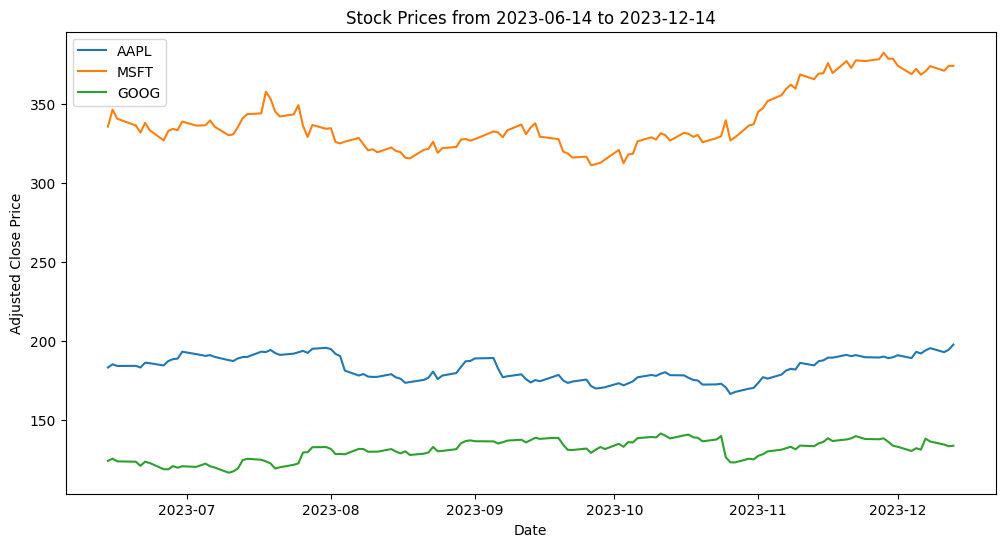

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for asset in assets:
    plt.plot(quote_table.index, quote_table[asset], label=asset)

plt.title('Stock Prices from {} to {}'.format(date_start, date_end))
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [9]:
!pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/4b/48/20e77ddb1f473d4717a7d4d3fc8d15557f406f7708496054c59f635b7734/scipy-1.11.4-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 1.3 MB/s eta 0:00:005.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 8.0 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


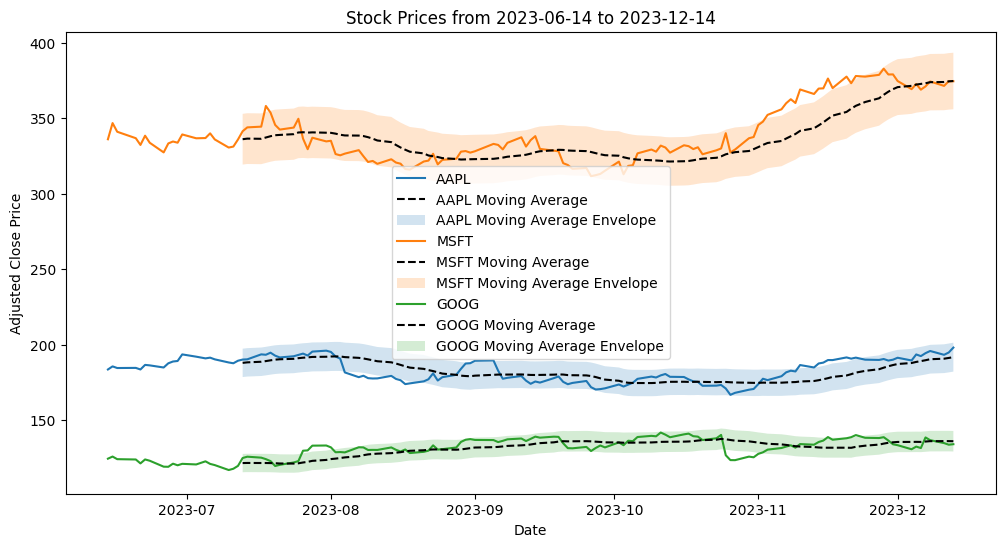

In [21]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

assets = ["AAPL", "MSFT", "GOOG"]
date_start = "2023-06-14"
date_end = "2023-12-14"

# quote_table = pdr.get_data_yahoo(assets, date_start, date_end)['Adj Close']

# plt.figure(figsize=(12, 6))
# for asset in assets:
#     plt.plot(quote_table.index, quote_table[asset], label=asset)

#     peaks = argrelextrema(quote_table[asset].values, np.greater)[0]
#     for peak in peaks:
#         plt.axhline(y=quote_table[asset].iloc[peak], color='r', linestyle='--', label=f'{asset} Resistance')

# plt.title('Stock Prices from {} to {}'.format(date_start, date_end))
# plt.xlabel('Date')
# plt.ylabel('Adjusted Close Price')
# plt.legend()
# plt.show()

window = 20

for asset in assets:
    quote_table[f'{asset} SMA'] = quote_table[asset].rolling(window=window).mean()
    quote_table[f'{asset} Upper Band'] = quote_table[f'{asset} SMA'] * 1.05  # Adjust the factor as needed
    quote_table[f'{asset} Lower Band'] = quote_table[f'{asset} SMA'] * 0.95  # Adjust the factor as needed

plt.figure(figsize=(12, 6))
for asset in assets:
    plt.plot(quote_table.index, quote_table[asset], label=asset)
    plt.plot(quote_table.index, quote_table[f'{asset} SMA'], label=f'{asset} Moving Average', linestyle='--', color='black')
    plt.fill_between(quote_table.index, quote_table[f'{asset} Lower Band'], quote_table[f'{asset} Upper Band'], alpha=0.2, label=f'{asset} Moving Average Envelope')

plt.title('Stock Prices from {} to {}'.format(date_start, date_end))
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()